# Visuallizing Measurement Error

Engineers collect data and make conclusions based on the results. An important way to view results is with statistical charts. In this exampe we will build a bar chart that compares the tensile strength of 3D-printed ABS plastic under different printing conditions.

We will add error bars to the chart to show the amount of uncertainty in the data. For this plot, the hieght of the bars represent the mean or average of the measured tensile stength in the sample of data. The error bars on the plot will represent +1/-1 standard deviation about the mean.

The data we are going to plot is stored in an Microsoft Excel File. You can download the sample data here (clicking link will start the download):

[3D-printed-tensile-bar-data.xlsx](https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/3D-printed_tensile_test_data.xlsx)

We'll use **pandas** to load the data into the notebook. The **Anaconda** distribution of Python comes with the **pandas** library already installed. If **pandas** is not available, open a terminal or the **Anaconda Prompt** and type:

```text
pip install pandas
```

or 

```text
conda install pandas

```

Note that when I first tried to run the ```pd.read_excel()``` function, I was returned an error:


```python
ImportError: Install xlrd >= 0.9.0 for Excel support
````

To solve this, I went to the **Anaconda Prompt** and typed:

```
conda install xlrd
```

Once the **xlrd** module was installed, the ```pd.read_excel()``` function worked just fine.

To start the jupyter notebook, we need to import the required packages:

**pandas**
**numpy**
**matplotlib**

The ```%matplotlib inline``` magic command is add so that we can see our plots right in the **jupyter notebook**.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_url = 'https://github.com/ProfessorKazarinoff/staticsite/raw/master/content/code/matplotlib_plots/3D-printed_tensile_test_data.xlsx'
df = pd.read_excel(data_url)
df.head()

,Material,Width (mm),Thickness (mm),Cross-sectional Area (mm^2),Maximum Force (N),Tensile Strength (Mpa)
0,ABS,6.33,3.61,22.8513,426,18.642265
1,ABS,6.27,3.80,23.8260,514,21.573071
2,ABS,6.29,3.61,22.7069,499,21.975699
3,ABS,6.28,3.50,21.9800,461,20.973612
4,ABS,6.25,3.72,23.2500,418,17.978495


**Pandas** has a nice little method to view the staticstics for column in our datafram called ```describe()```. We'll use the ```describe()``` method to get a look at our basic statistics. The tensile strength column is the one we are interested in. Note the ```describe()``` method needs to include the ```()``` parenthesis at the end. 

In [3]:
df['Tensile Strength (Mpa)'].describe()

count    36.000000
mean     14.881000
std       4.983496
min       4.931429
25%      10.695890
50%      13.420756
75%      19.429057
max      23.825110
Name: Tensile Strength (Mpa), dtype: float64

This gives us the mean for the whole tensile strength column, but we are intrested in comparing the two materials, ABS and HIPS. HIPS stands for High-Impact PolyStyrene and is a common 3-D printing fillament material like ABS and PLA. We need a way to only group the ABS data together and group the HIPS data seperatly. We can view the statistics for the rows that are ABS data and the rows that are HIPS data seperatly using **pandas** ```groupby``` method.

In [4]:
df['Tensile Strength (Mpa)'].groupby(df['Material']).describe()

,count,mean,std,min,25%,50%,75%,max
Material,,,,,,,,
ABS,16.0,19.935392,1.796473,16.022111,19.166825,19.618907,20.978060,23.825110
HIPS,20.0,10.837486,2.116019,4.931429,10.182108,10.762229,11.982909,14.759169


In [5]:
ABS_df = df[df['Material'] == 'ABS']
HIPS_df = df[df['Material'] == 'HIPS']

Let's save the ```mean``` (the average) and the ```std``` (standard deviation) to new variables

In [6]:
ABS_mean = ABS_df['Tensile Strength (Mpa)'].mean()
ABS_stdev = ABS_df['Tensile Strength (Mpa)'].std()

HIPS_mean = HIPS_df['Tensile Strength (Mpa)'].mean()
HIPS_stdev = HIPS_df['Tensile Strength (Mpa)'].std()

Time to fire up the plot. We will build a plot using **matplotlib**.  

We'll use **matplotlibs** ```plt.bar``` method to build the plot. 

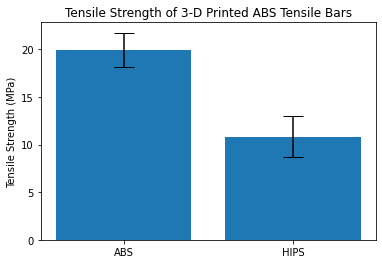

In [7]:
plt.bar(['ABS', 'HIPS'], [ABS_mean, HIPS_mean], yerr=[ABS_stdev, HIPS_stdev], capsize=10)
plt.ylabel('Tensile Strength (MPa)')
plt.title('Tensile Strength of 3-D Printed ABS Tensile Bars')
plt.savefig('ABS_HIPS_plot_with_error_bars.png', dpi=300, bbox_inches='tight')
plt.show()